<p style="text-align: right; direction: rtl; float: right; clear: both;">
שלום!, בפרויקטון זה אני יחקור את מערך הנתונים שבו ישנם הרבה נתונים על משחקים, לדוגמא: האם יש בו דם?, אלימות? והדירוג שלו בESRB ובהמשך אני יעשה מודל שינסה לפענך את הדירוג של המשחק לפי הנתונים האלו. אז באו נתחיל! 
</p>

<p style="text-align: right; direction: rtl; float: right; clear: both;">
 לפני שנתחיל עם הניתוך של הנתונים בואו קודם נבין יותר לעומק את מערך הנתונים הזה ונבין מה זה בעצם ESRB<br>
ESRB (The Entertainment Software Rating Board) . היא שיטת דירוג של משחקי מחשב המשומשת בעיקר בארצות הברית. היא נותנת לכל משחק שיוצא דירוג מסויים . לפי התוכן הנמצא בו, כמו בסרטים<br>
ישנם שישה דירוגים היכולים להיות למשחק ובנוסף לכל דירוג רשום גם את התוכן הגורם לו להגיע לדירוג זה.<br>
הדירוג ניתן למשחק עקב שאלון עם יוצרי המשחק ,תמונות ורגעים במשחק עצמו ותגובות של אנשים שמטרתם לדרג את המשחק.<br>
המטרה בעצם של הדירוגים היא לעזור להורים ולקונים של המשחק לדעת בדיוק למה לצפות באט הקנייה או לפני הקנייה כדאי שלא יהיה מצב שבו התוכן במשחק פוגע בקונה ללא ידיעתו
</p>

<p style="text-align: right; direction: rtl; float: right; clear: both;">
עכשיו שסיימנו להבין את המטרות שלו ולהבין את מערך הנתונים עצמו, בוא נתחיל לייבא את הספריות הדרושות על מנת שנוכל להתחיל לחקור את מערך הנתונים! 
</p>

In [2]:
#להוריד את כל הספריות הדרושות
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

sns.set()

In [3]:
#לטעון את מערך הנתונים שלנו
trainFrame = pd.read_csv('Video_games_esrb_rating.csv')

In [20]:
# הסתכלות מהירה על מערך הנתונים
print("The dataset has " + str(trainFrame.shape[0]) + " rows.")
print("And " + str(trainFrame.shape[1]) + " columns atleast.")

print("List of columns: ", trainFrame.columns)

trainFrame.head(5)

The dataset has 1895 rows.
And 34 columns atleast.
List of columns:  Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')


,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


<p style="text-align: right; direction: rtl; float: right; clear: both;">
כמו שאנחנו יכולים לראות: ישנם 1895 שורות של נתונים ו34 טורים של דוגמאות הכוללות:<br>
שם המשחק, האם יש בו דם?, האם יש בו אלימות?, האם יש בו תכנים מיניים? ועוד<br>
בנוסף, אנחנו יכולים לראות שבכל התכונות האלו יש או 1 או 0: 1 אומר שיש את הדבר הזה ו 0 אומר שאין, בואו נבדוק האם יש איזו שהיא בעייה עם המוסד נתונים כמו עמודות רקות או שגיאות כתיב
</p>

In [10]:
#לשנות שגיאת כתיב של אחת העמודות
main_data = main_data.rename(columns={"strong_janguage": "strong_language"})

In [23]:
#לבדוק האם קיימות עמודות שיש בהן כלום
procent_of_null = main_data.isnull().sum() / main_data.shape[0]
print(procent_of_null)

print("")

procent_of_nan = main_data.isna().sum() / main_data.shape[0]
print(procent_of_nan)

title                       0.0
console                     0.0
alcohol_reference           0.0
animated_blood              0.0
blood                       0.0
blood_and_gore              0.0
cartoon_violence            0.0
crude_humor                 0.0
drug_reference              0.0
fantasy_violence            0.0
intense_violence            0.0
language                    0.0
lyrics                      0.0
mature_humor                0.0
mild_blood                  0.0
mild_cartoon_violence       0.0
mild_fantasy_violence       0.0
mild_language               0.0
mild_lyrics                 0.0
mild_suggestive_themes      0.0
mild_violence               0.0
no_descriptors              0.0
nudity                      0.0
partial_nudity              0.0
sexual_content              0.0
sexual_themes               0.0
simulated_gambling          0.0
strong_language             0.0
strong_sexual_content       0.0
suggestive_themes           0.0
use_of_alcohol              0.0
use_of_d

<p style="text-align: right; direction: rtl; float: right; clear: both;">
נראה שכן מצאנו שגיאת כתיב ותיקנו אותה ונראה שאין באף עמודה ריק, מעולה!<br>
עכשיו בואו נשים את הנתונים בגרף בשביל לראות אותם בצורה יותר ברורה, נתחיל עם הקונסולה בה המשחקים נמצאים
</p>

Text(0.5, 1.0, 'Count of games on different consoles')

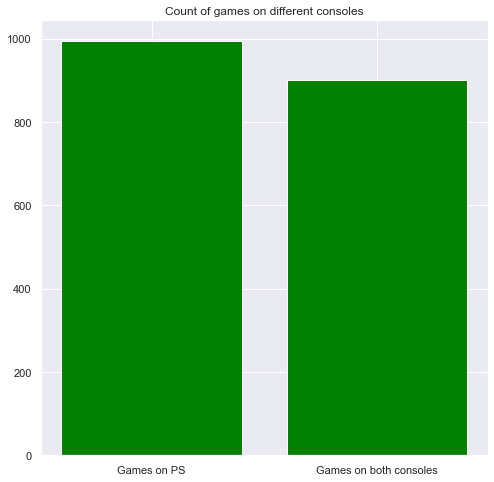

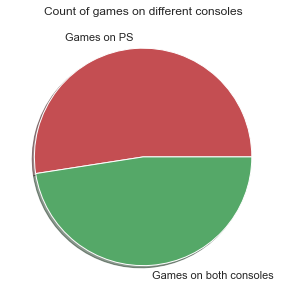

In [17]:
# size
plt.figure(figsize=(8, 8))

# pie and bar graphs
consoles_labels = ["Games on PS", "Games on both consoles"]

playstation = trainFrame[trainFrame["console"] == 0]
both_consoles = trainFrame[trainFrame["console"] == 1]

consoles_names = [len(playstation), len(both_consoles)]

plt.bar(consoles_labels, consoles_names, color = "green")
plt.title("Count of games on different consoles")

plt.figure(figsize=(19, 5))
plt.pie(consoles_names, labels = consoles_labels, shadow = True, colors = "rgbyc")
plt.title("Count of games on different consoles")

<p style="text-align: right; direction: rtl; float: right; clear: both;">
בואו נראה מה אנחנו יכולים להסיק מהגרפים האלו<br>
ישנם יותר מ1000 משחקים הנמצאים רק בפלייסטשן ובמשחקים הנמצאים גם בפלייסטשן וגם באקסבוקס ישנם אך ורק 900<br>
מפה אנחנו יכולים להבין שישנם יותר משחקים הנמצאים אקסקלוסיבית רק בפלייסטשן מאשר משחקים הנמצאים בשני הקוסולות<br>
</p>

<p style="text-align: right; direction: rtl; float: right; clear: both;">
עכשיו בואו נסתכל ונראה אילו ניתונים משפיעים יותר על הדירוג ESRB של משחק. נעשה את זה באמצאות מפת חום:
</p>

<AxesSubplot:>

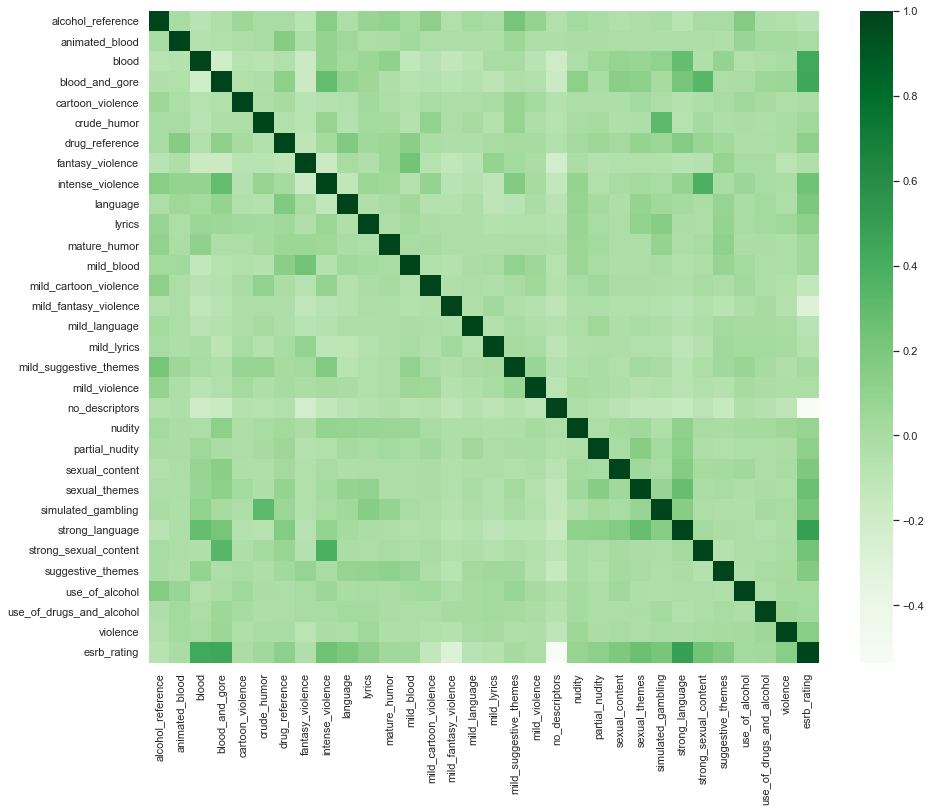

In [11]:
# correlation
# size
plt.figure(figsize=(15, 12))

useless_cols = ["title", "console"] 
corr_data = main_data.drop(useless_cols, axis = 1)

encode = {'E' : 0,
          'ET': 1,
          'T' : 2,
          'M' : 3}

corr_data["esrb_rating"] = corr_data["esrb_rating"].map(encode)

corr_cols = list(corr_data.columns)

main_correlation = corr_data[corr_cols].corr()
sns.heatmap(main_correlation, annot = False, cmap = "Greens")

<p style="text-align: right; direction: rtl; float: right; clear: both;">
פה אנחנו יכולים לראות כמה דברים<br>
דבר ראשון: לעמודות כמו דם, דם ואלימות ביחד, ושפה בוטה יש קשר חזק מאוד לדירוג<br> ERSB
דבר שני: לעמודות כמו עירום, השתמשות בשמים ואלכוהול יש קשר מאוד מאוד חלש לדירוג ESRB
</p>

<p style="text-align: right; direction: rtl; float: right; clear: both;">
עכשיו אחרי שעברנו וגילינו אילו עמודות משפיעות יותר, בואו נסתכל בגרפים נפרדים על כל אחת מהן בשביל לגלות יותר מידע עליהם<br>
נתחיל עם הדם:
</p>

Text(0.5, 1.0, 'Is there blood?')

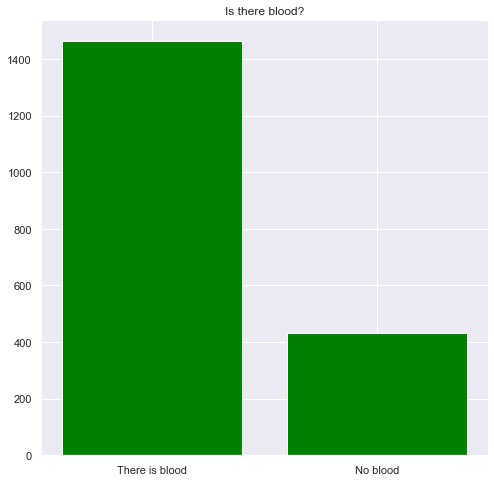

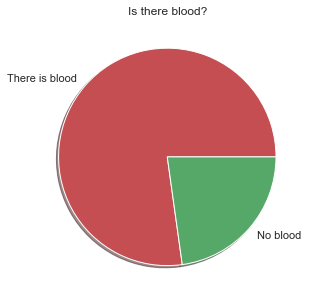

In [12]:
# about blood in video games
plt.figure(figsize=(8, 8))
blood_labels = ["There is blood", "No blood"]

blood_0 = main_data[main_data["blood"] == 0]
blood_1 = main_data[main_data["blood"] == 1]

blood_names = [len(blood_0), len(blood_1)]

plt.bar(blood_labels, blood_names, color = "green")
plt.title("Is there blood?")

plt.figure(figsize=(19, 5))
plt.pie(blood_names, labels = blood_labels, shadow = True, colors = "rgbyc")
plt.title("Is there blood?")

<p style="text-align: right; direction: rtl; float: right; clear: both;">
פה אנחנו יכולים לראות כמה דברים<br>
דבר ראשון: ישנם הרבה יותר משחקים שיש בהם דם מאשר משחקים שאין בהם דם בכלל<br> ERSB
דבר שני: ישנם יותר מ1400 משחקים שיש בהם דם ESRB
</p>

<p style="text-align: right; direction: rtl; float: right; clear: both;">
עכשיו נעבור לדם ואלימות:
</p>

Text(0.5, 1.0, 'Is there blood and gore?')

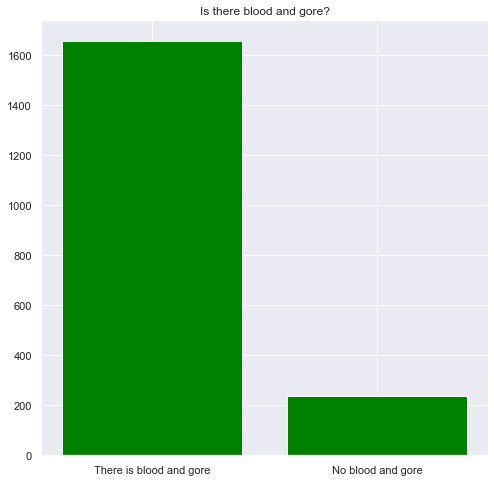

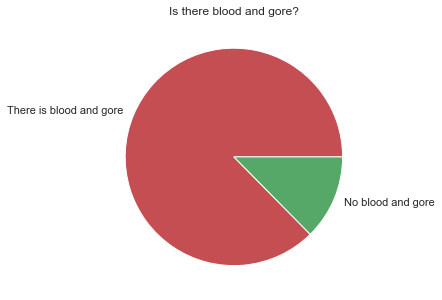

In [13]:
# blood and gore column
# size
plt.figure(figsize=(8, 8))
blood_and_gore_labels = ["There is blood and gore", "No blood and gore"]

blood_and_gore_0 = main_data[main_data["blood_and_gore"] == 0]
blood_and_gore_1 = main_data[main_data["blood_and_gore"] == 1]

blood_and_gore_names = [len(blood_and_gore_0), len(blood_and_gore_1)]

plt.bar(blood_and_gore_labels, blood_and_gore_names, color = "green")
plt.title("Is there blood and gore?")

plt.figure(figsize=(19, 5))
plt.pie(blood_and_gore_names, labels = blood_and_gore_labels,  colors = "rgbyc")
plt.title("Is there blood and gore?")

<p style="text-align: right; direction: rtl; float: right; clear: both;">
פה אנחנו יכולים לראות כמה דברים<br>
דבר ראשון: ישנם הרבה יותר משחקים שיש בהם דם ואלימות מאשר משחקים שאין בהם דם ואלימות בכלל<br> ERSB
דבר שני: ישנם יותר מ1600 משחקים שיש בהם דם ואלימות ESRB
</p>

<p style="text-align: right; direction: rtl; float: right; clear: both;">
עכשיו נעבור לשפה בוטה:
</p>

Text(0.5, 1.0, 'Is there strong language?')

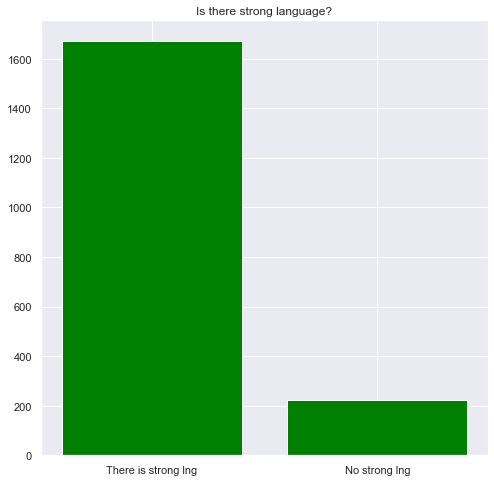

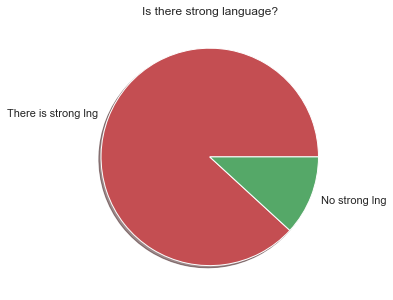

In [15]:
# about strong language
# size
plt.figure(figsize=(8, 8))
strong_lg_labels = ["There is strong lng", "No strong lng"]

strong_lg_0 = main_data[main_data["strong_language"] == 0]
strong_lg_1 = main_data[main_data["strong_language"] == 1]

strong_lg_names = [len(strong_lg_0), len(strong_lg_1)]

plt.bar(strong_lg_labels, strong_lg_names, color = "green")
plt.title("Is there strong language?")

plt.figure(figsize=(19, 5))
plt.pie(strong_lg_names, labels = strong_lg_labels, shadow = True, colors = "rgbyc")
plt.title("Is there strong language?")

<p style="text-align: right; direction: rtl; float: right; clear: both;">
פה אנחנו יכולים לראות כמה דברים<br>
דבר ראשון: ישנם הרבה יותר משחקים שיש בהם שפה בוטה מאשר משחקים שאין בהם שפה בוטה בכלל<br> ERSB
דבר שני: ישנם יותר מ1600 משחקים שיש בהם שפה בוטה ESRB
</p>

<p style="text-align: right; direction: rtl; float: right; clear: both;">
עכשיו אחרי שסיימנו עם העמודות האחרות בואו נסתכל על עמודת הדירוג. אם נסתכל טוב נוכל לראות שבאמת יש רק 4 דירוגים מיוחדים<br>
E, M, T, ET<br>
לכן, נעשה גרף המראה רק את ארבעת הדירוגים האלו:
</p>

Text(0.5, 1.0, 'Rating distribution')

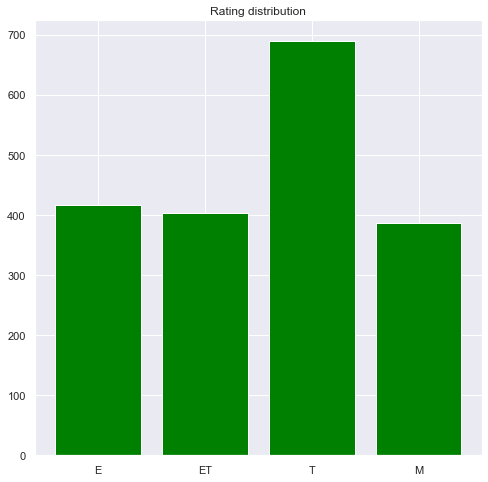

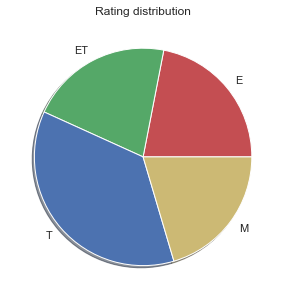

In [16]:
# ratings
# size
plt.figure(figsize=(8, 8))
rating_labels = ["E", "ET", "T", "M"]

E_rating = main_data[main_data["esrb_rating"] == "E"]
ET_rating = main_data[main_data["esrb_rating"] == "ET"]
T_rating = main_data[main_data["esrb_rating"] == "T"]
M_rating = main_data[main_data["esrb_rating"] == "M"]

rating_names = [len(E_rating), len(ET_rating), len(T_rating), len(M_rating)]

plt.bar(rating_labels, rating_names, color = "green")
plt.title("Rating distribution")

plt.figure(figsize=(19, 5))
plt.pie(rating_names, labels = rating_labels, shadow = True, colors = "rgbyc")
plt.title("Rating distribution")

<p style="text-align: right; direction: rtl; float: right; clear: both;">
פה אנחנו יכולים לראות כמה דברים<br>
דבר ראשון: ישנם הרבה משחקים שמדורגים בתור T אך מעט מאוד מהמשחקים מדורגים בתור M או ET <br>
דבר שני: בערך חצי מהמשחקים מדורגים בתור T, לE ו ET  יש בערך 400 משחקים המדורגים כך ולM יש הכי מעט עם 390 משחקים בערך
</p>

<p style="text-align: right; direction: rtl; float: right; clear: both;">
אוקיי, סיימנו עם חקר הנתונים עכשיו נעבור למודל עצמו<br>
מטרת המודל ומטרת המוסד נתונים הזה הוא לפענך לפי כל הנתונים הקיימים על המשחק מה יהיה הדירוג שלו<br>
לפי החקירה שאנחנו עשינו על מוסד נתונים זה אנחנו יכולים להבין שבעייה כזאת נראת בעיית clasification, ולכן נוכל לפתור אותה עם מודל clasifier<br>
מכיוון שישנם 4 רמות דירוג שונות נשתמש בsoftmax על מנת לפענך סופית את הדירוג
</p>

<p style="text-align: right; direction: rtl; float: right; clear: both;">
המודל הראשון שניסיתי הוא מודל עם optimizer של adams
</p>

In [7]:
# split into input and output columns
X, y = trainFrame.values[:,1 :-1], trainFrame.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(4, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {acc:.3f}')

(1269, 32) (626, 32) (1269,) (626,)
Test Accuracy: 0.872


<p style="text-align: right; direction: rtl; float: right; clear: both;">
כמו שאנחנו יכולים לראות: אחוז ההצלחה שלו הוא 87 אחוז, שזה לא רע בכלל<br>
עכשיו בואו ננסה לעשות מודל אחר עם optimizer של RMSprop
</p>

In [5]:
# split into input and output columns
X, y = trainFrame.values[:,1 :-1], trainFrame.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(4, activation='softmax'))

# compile the model
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {acc:.3f}')

(1269, 32) (626, 32) (1269,) (626,)
Test Accuracy: 0.867


<p style="text-align: right; direction: rtl; float: right; clear: both;">
טוב, כמו שאנחנו יכולים לראות: אין כמעט שינוי בכלל בין שני הoptimizers
</p>